# Part 1 - Exploratory data analysis

The attached *logins.json* file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15-minute
time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [8]:
# read the json file containing all the user login timestamps
timestamps = pd.read_json('logins.json')

In [9]:
timestamps.head(30)

login_time
0  1970-01-01 20:13:18
1  1970-01-01 20:16:10
2  1970-01-01 20:16:37
3  1970-01-01 20:16:36
4  1970-01-01 20:26:21
5  1970-01-01 20:21:41
6  1970-01-01 20:12:16
7  1970-01-01 20:35:47
8  1970-01-01 20:35:38
9  1970-01-01 20:47:52
10 1970-01-01 20:26:05
11 1970-01-01 20:31:03
12 1970-01-01 20:34:46
13 1970-01-01 20:36:34
14 1970-01-01 20:39:25
15 1970-01-01 20:40:37
16 1970-01-01 20:34:58
17 1970-01-01 20:43:59
18 1970-01-01 20:47:46
19 1970-01-01 20:46:34
20 1970-01-01 20:56:07
21 1970-01-01 20:49:12
22 1970-01-01 20:59:06
23 1970-01-01 20:59:59
24 1970-01-01 21:15:01
25 1970-01-01 21:09:24
26 1970-01-01 21:19:24
27 1970-01-01 21:20:53
28 1970-01-01 21:29:19
29 1970-01-01 21:58:05

In [10]:
timestamps.shape

(93142, 1)

In [11]:
timestamps.columns

Index(['login_time'], dtype='object')

In [13]:
timestamps['login_time'] = pd.to_datetime(timestamps.login_time, format="%Y%m%d %H%M")
timestamps.head(30)

login_time
0  1970-01-01 20:13:18
1  1970-01-01 20:16:10
2  1970-01-01 20:16:37
3  1970-01-01 20:16:36
4  1970-01-01 20:26:21
5  1970-01-01 20:21:41
6  1970-01-01 20:12:16
7  1970-01-01 20:35:47
8  1970-01-01 20:35:38
9  1970-01-01 20:47:52
10 1970-01-01 20:26:05
11 1970-01-01 20:31:03
12 1970-01-01 20:34:46
13 1970-01-01 20:36:34
14 1970-01-01 20:39:25
15 1970-01-01 20:40:37
16 1970-01-01 20:34:58
17 1970-01-01 20:43:59
18 1970-01-01 20:47:46
19 1970-01-01 20:46:34
20 1970-01-01 20:56:07
21 1970-01-01 20:49:12
22 1970-01-01 20:59:06
23 1970-01-01 20:59:59
24 1970-01-01 21:15:01
25 1970-01-01 21:09:24
26 1970-01-01 21:19:24
27 1970-01-01 21:20:53
28 1970-01-01 21:29:19
29 1970-01-01 21:58:05

In [14]:
timestamps.columns

Index(['login_time'], dtype='object')

In [17]:
df = timestamps.set_index('login_time')
df.head(30)

Empty DataFrame
Columns: []
Index: [1970-01-01 20:13:18, 1970-01-01 20:16:10, 1970-01-01 20:16:37, 1970-01-01 20:16:36, 1970-01-01 20:26:21, 1970-01-01 20:21:41, 1970-01-01 20:12:16, 1970-01-01 20:35:47, 1970-01-01 20:35:38, 1970-01-01 20:47:52, 1970-01-01 20:26:05, 1970-01-01 20:31:03, 1970-01-01 20:34:46, 1970-01-01 20:36:34, 1970-01-01 20:39:25, 1970-01-01 20:40:37, 1970-01-01 20:34:58, 1970-01-01 20:43:59, 1970-01-01 20:47:46, 1970-01-01 20:46:34, 1970-01-01 20:56:07, 1970-01-01 20:49:12, 1970-01-01 20:59:06, 1970-01-01 20:59:59, 1970-01-01 21:15:01, 1970-01-01 21:09:24, 1970-01-01 21:19:24, 1970-01-01 21:20:53, 1970-01-01 21:29:19, 1970-01-01 21:58:05]

In [20]:
timestamps['interval'] = timestamps['login_time'].dt.floor('15T')
timestamps.head(30)

C:\Users\tanks\AppData\Local\Temp\ipykernel_20208\1107566367.py:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  timestamps['interval'] = timestamps['login_time'].dt.floor('15T')


login_time            interval
0  1970-01-01 20:13:18 1970-01-01 20:00:00
1  1970-01-01 20:16:10 1970-01-01 20:15:00
2  1970-01-01 20:16:37 1970-01-01 20:15:00
3  1970-01-01 20:16:36 1970-01-01 20:15:00
4  1970-01-01 20:26:21 1970-01-01 20:15:00
5  1970-01-01 20:21:41 1970-01-01 20:15:00
6  1970-01-01 20:12:16 1970-01-01 20:00:00
7  1970-01-01 20:35:47 1970-01-01 20:30:00
8  1970-01-01 20:35:38 1970-01-01 20:30:00
9  1970-01-01 20:47:52 1970-01-01 20:45:00
10 1970-01-01 20:26:05 1970-01-01 20:15:00
11 1970-01-01 20:31:03 1970-01-01 20:30:00
12 1970-01-01 20:34:46 1970-01-01 20:30:00
13 1970-01-01 20:36:34 1970-01-01 20:30:00
14 1970-01-01 20:39:25 1970-01-01 20:30:00
15 1970-01-01 20:40:37 1970-01-01 20:30:00
16 1970-01-01 20:34:58 1970-01-01 20:30:00
17 1970-01-01 20:43:59 1970-01-01 20:30:00
18 1970-01-01 20:47:46 1970-01-01 20:45:00
19 1970-01-01 20:46:34 1970-01-01 20:45:00
20 1970-01-01 20:56:07 1970-01-01 20:45:00
21 1970-01-01 20:49:12 1970-01-01 20:45:00
22 1970-01-01 20:59:06 1970-01-01 20:45:00
23 1970-01-01 20:59:59 1970-01-01 20:45:00
24 1970-01-01 21:15:01 1970-01-01 21:15:00
25 1970-01-01 21:09:24 1970-01-01 21:00:00
26 1970-01-01 21:19:24 1970-01-01 21:15:00
27 1970-01-01 21:20:53 1970-01-01 21:15:00
28 1970-01-01 21:29:19 1970-01-01 21:15:00
29 1970-01-01 21:58:05 1970-01-01 21:45:00

In [28]:
all_intervals = timestamps.interval.drop_duplicates()

In [30]:
len(all_intervals)

9381

In [32]:
df = timestamps.groupby('interval').count()

In [33]:
df

login_time
interval                       
1970-01-01 20:00:00           2
1970-01-01 20:15:00           6
1970-01-01 20:30:00           9
1970-01-01 20:45:00           7
1970-01-01 21:00:00           1
...                         ...
1970-04-13 17:45:00           5
1970-04-13 18:00:00           5
1970-04-13 18:15:00           2
1970-04-13 18:30:00           7
1970-04-13 18:45:00           6

[9381 rows x 1 columns]

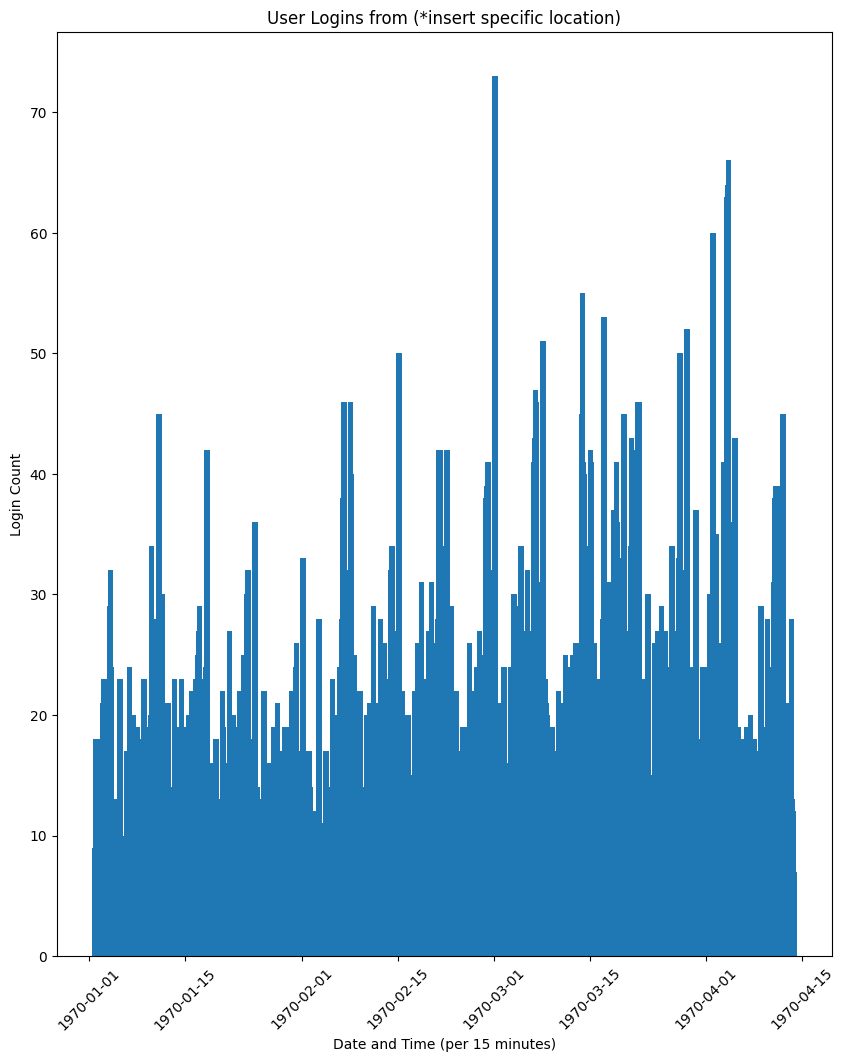

In [44]:
plt.figure(figsize=(10,12))
plt.bar(df.index, df.login_time)

plt.title("User Logins from (*insert specific location)")
plt.xlabel("Date and Time (per 15 minutes)")
plt.ylabel("Login Count")
plt.xticks(rotation=45)
plt.show()

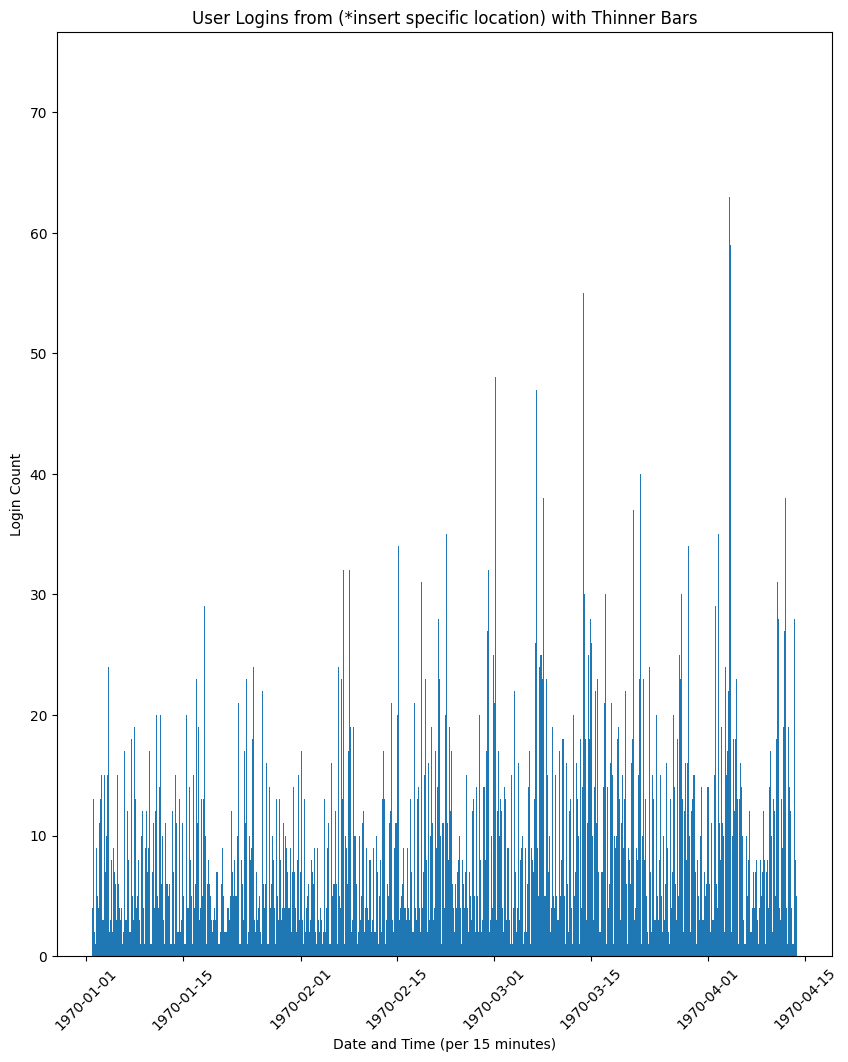

In [89]:
plt.figure(figsize=(10,12))
plt.hist(timestamps['login_time'], df.index)

plt.title("User Logins from (*insert specific location) with Thinner Bars")
plt.xlabel("Date and Time (per 15 minutes)")
plt.ylabel("Login Count")
plt.xticks(rotation=45)
plt.show()

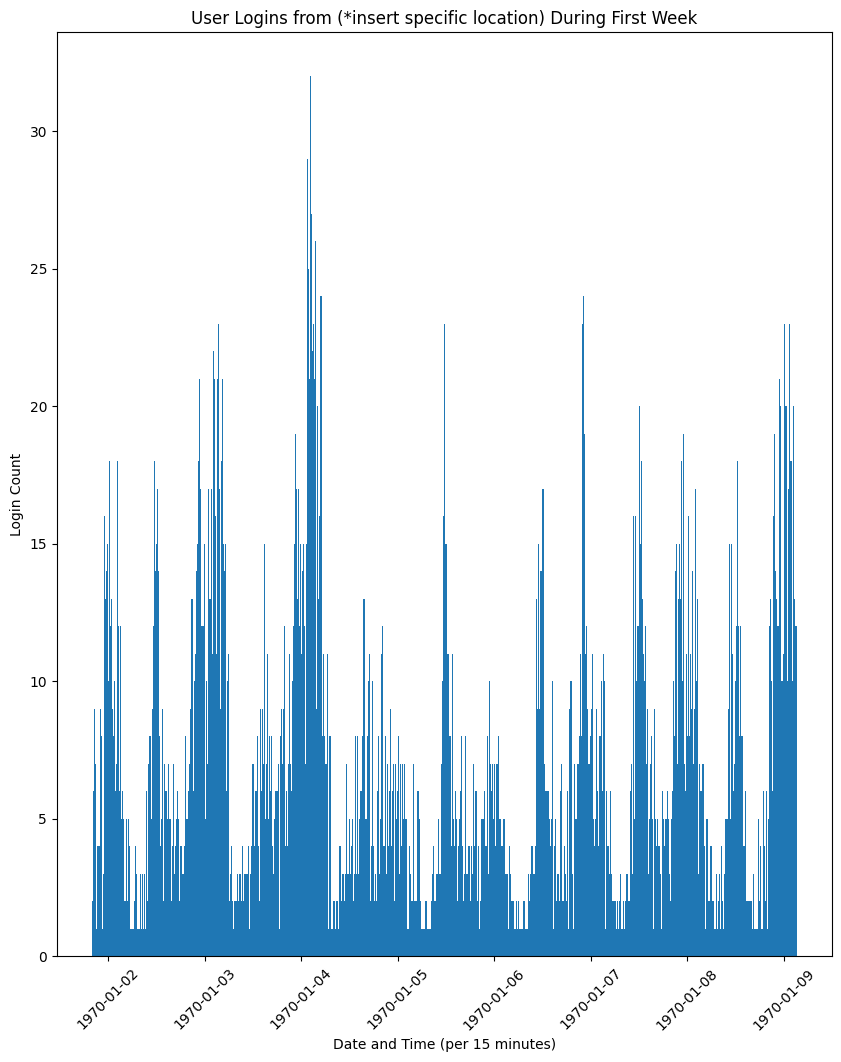

In [61]:
plt.figure(figsize=(10,12))
plt.hist(timestamps['login_time'], df.index[96*0:96*7])

plt.title("User Logins from (*insert specific location) During First Week")
plt.xlabel("Date and Time (per 15 minutes)")
plt.ylabel("Login Count")
plt.xticks(rotation=45)
plt.show()

There appears to be some cyclical pattern to the data, let's try to break it down into individual days to check for daily cycles.

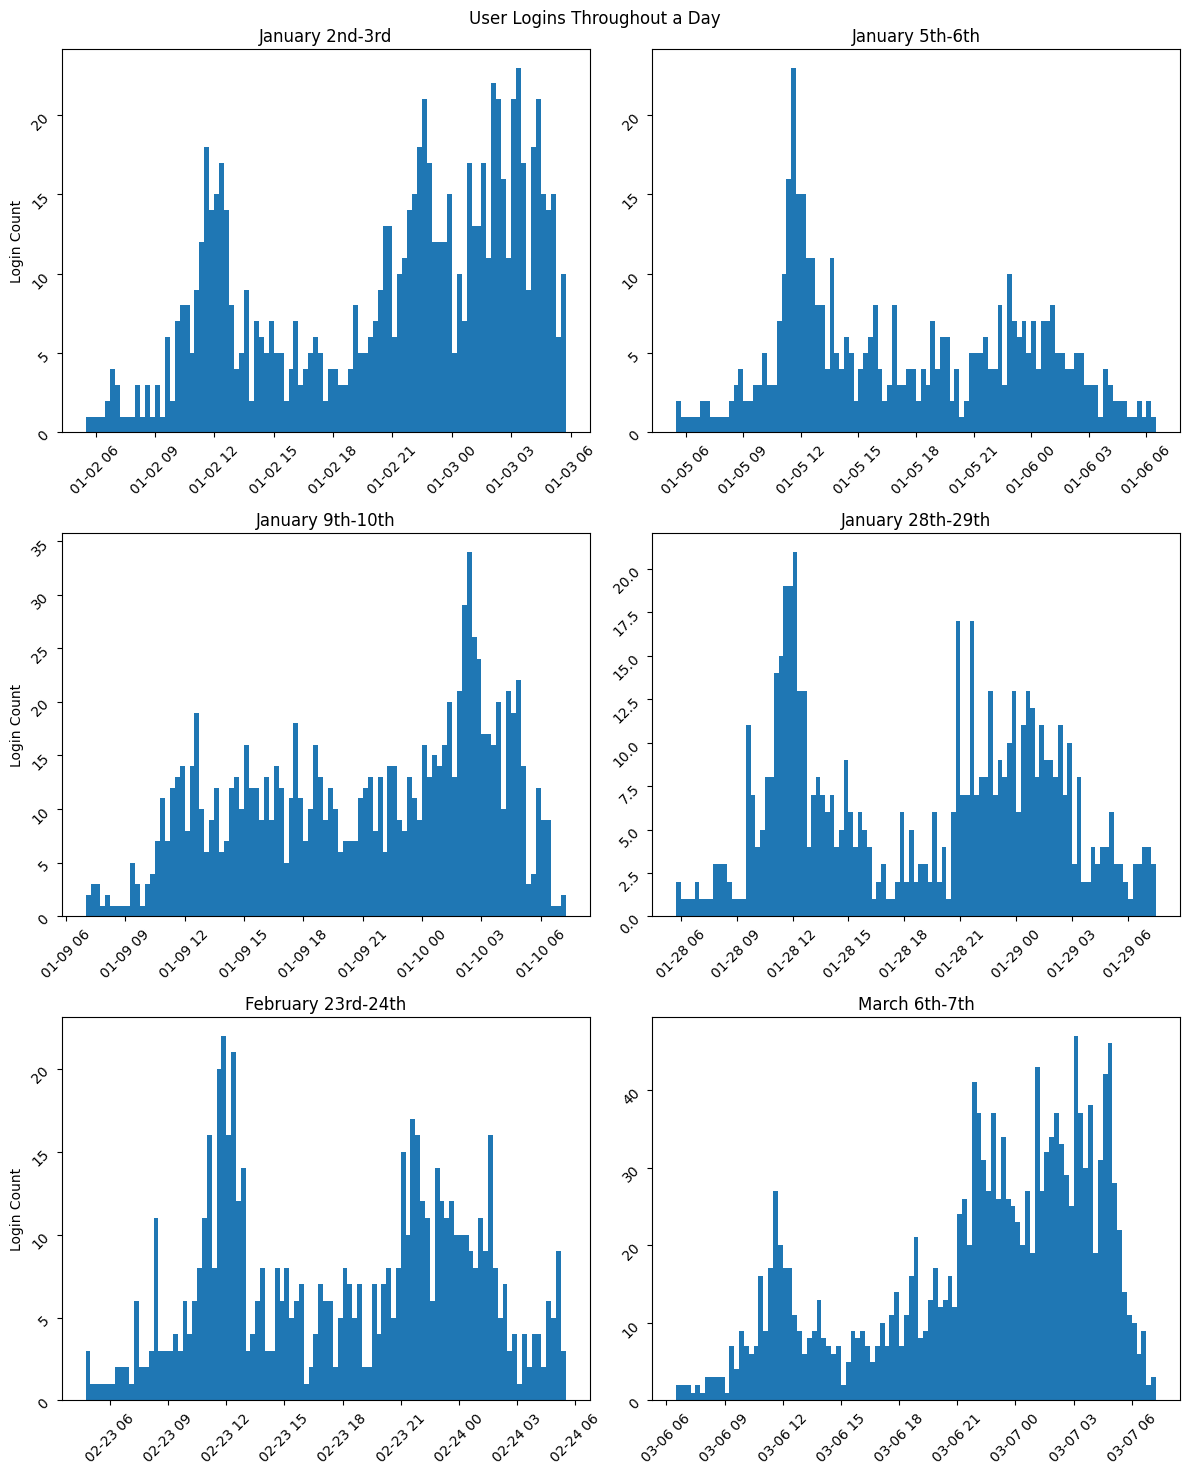

In [88]:
fig, ax = plt.subplots(3, 2, sharey=False, figsize=(12, 15))


ax[0,0].hist(timestamps['login_time'], df.index[96*0+36:96*1+36])
ax[0,0].set_title("January 2nd-3rd")
ax[0,0].set_ylabel("Login Count")
ax[0,0].tick_params(labelrotation=45)
#ax[0,0].set_xticklabels(df.index.format('%m%d&H'), rotation=45)

ax[0,1].hist(timestamps['login_time'], df.index[96*3+30:96*4+30])
ax[0,1].set_title("January 5th-6th")
ax[0,1].tick_params(labelrotation=45)

ax[1,0].hist(timestamps['login_time'], df.index[96*7+12:96*8+12])
ax[1,0].set_title("January 9th-10th")
ax[1,0].set_ylabel("Login Count")
ax[1,0].tick_params(labelrotation=45)

ax[1,1].hist(timestamps['login_time'], df.index[96*25+12:96*26+12])
ax[1,1].set_title("January 28th-29th")
ax[1,1].tick_params(labelrotation=45)

ax[2,0].hist(timestamps['login_time'], df.index[96*50-18:96*51-18])
ax[2,0].set_title("February 23rd-24th")
ax[2,0].set_ylabel("Login Count")
ax[2,0].tick_params(labelrotation=45)

ax[2,1].hist(timestamps['login_time'], df.index[96*60+36:96*61+36])
ax[2,1].set_title("March 6th-7th")
ax[2,1].tick_params(labelrotation=45)

plt.suptitle("User Logins Throughout a Day")
fig.tight_layout()
plt.show()

Based on multiple samples, each the length of a day, there appears to be higher user logins around midnight and midday.

## Conclusion: Elevated user traffic during midday and midnight on a daily basis.